In [723]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Задача 1
##### Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы

In [724]:
df =  pd.read_csv("kc_house_data.csv", sep= ',', encoding = 'windows-1252')
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12293,8856004582,20140717T000000,198000.0,3,1.75,1300,6318,1.0,0,0,...,7,1300.0,0,1980,0,98001,47.2752,-122.251,1150,8002
12571,3343300065,20140902T000000,515000.0,4,2.50,2280,14810,1.0,0,0,...,8,1500.0,780,1977,0,98056,47.5392,-122.186,2690,12196
14937,5437820250,20141110T000000,187000.0,2,1.75,1020,10346,1.0,0,0,...,6,1020.0,0,1983,0,98022,47.1958,-122.002,1160,8610
5585,6632300161,20150428T000000,422000.0,3,1.00,1160,7854,1.0,0,0,...,7,1160.0,0,1960,0,98125,47.7304,-122.308,1300,8317
21565,5007500120,20150226T000000,341780.0,4,2.75,2260,4440,2.0,0,0,...,7,2260.0,0,2014,0,98001,47.3507,-122.291,2260,4563


##### 1.2. Изучите стоимости недвижимости

In [725]:
data = df.groupby('price')['id'].agg(count='count').reset_index()
data.sample(10)

,price,count
1239,371500.0,2
2894,758000.0,1
1832,480680.0,1
2568,653750.0,1
491,250275.0,1
3096,833450.0,1
51,129000.0,3
474,246700.0,1
2511,638250.0,1
2963,783000.0,1


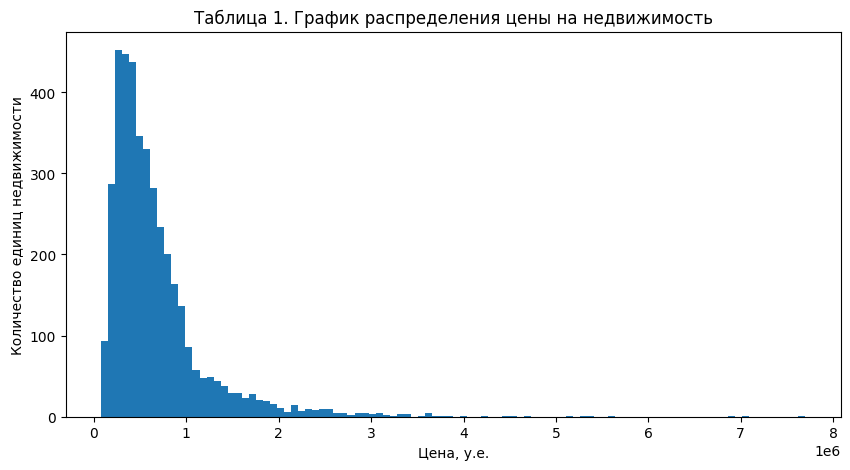

In [726]:
plt.figure(figsize=(10, 5))
plt.hist(data['price'], bins = 100)
plt.title('Таблица 1. График распределения цены на недвижимость')
plt.xlabel('Цена, у.е.')
plt.ylabel('Количество единиц недвижимости')
plt.xticks(rotation = 0);


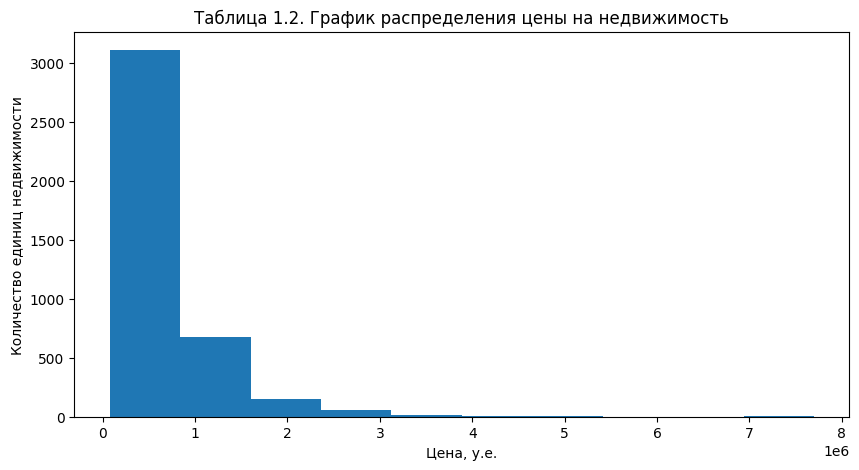

In [727]:
plt.figure(figsize=(10, 5))
plt.hist(data['price'], bins = 10)
plt.title('Таблица 1.2. График распределения цены на недвижимость')
plt.xlabel('Цена, у.е.')
plt.ylabel('Количество единиц недвижимости')
plt.xticks(rotation = 0);


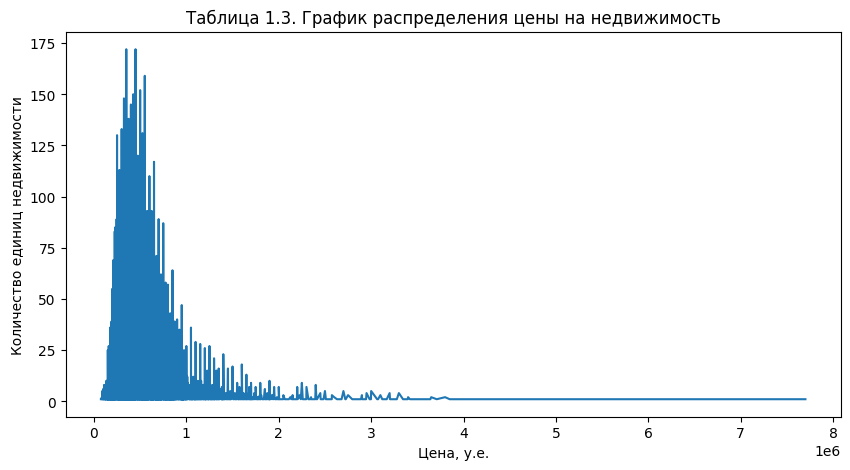

In [728]:
plt.figure(figsize=(10, 5))
plt.plot(data['price'], data['count'])
plt.title('Таблица 1.3. График распределения цены на недвижимость')
plt.xlabel('Цена, у.е.')
plt.ylabel('Количество единиц недвижимости')
plt.xticks(rotation = 0);

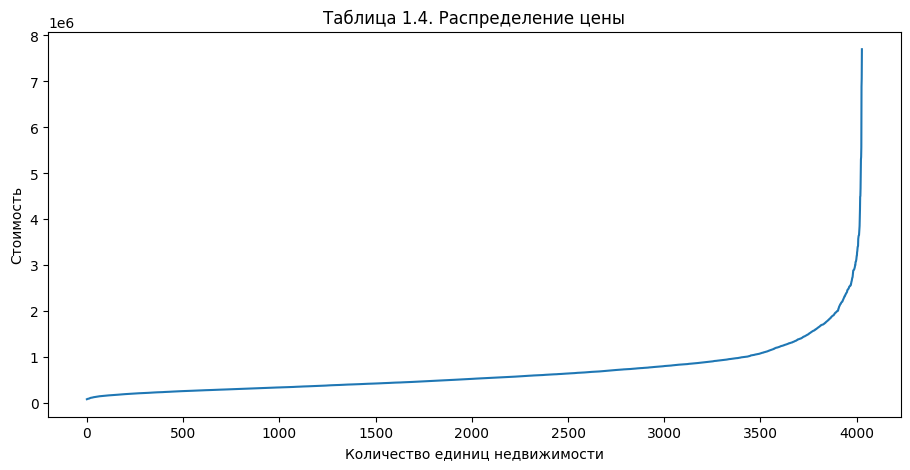

In [729]:
plt.figure(figsize=(11, 5))
plt.plot(data['price'])
plt.title('Таблица 1.4. Распределение цены')
plt.xlabel('Количество единиц недвижимости')
plt.ylabel('Стоимость');

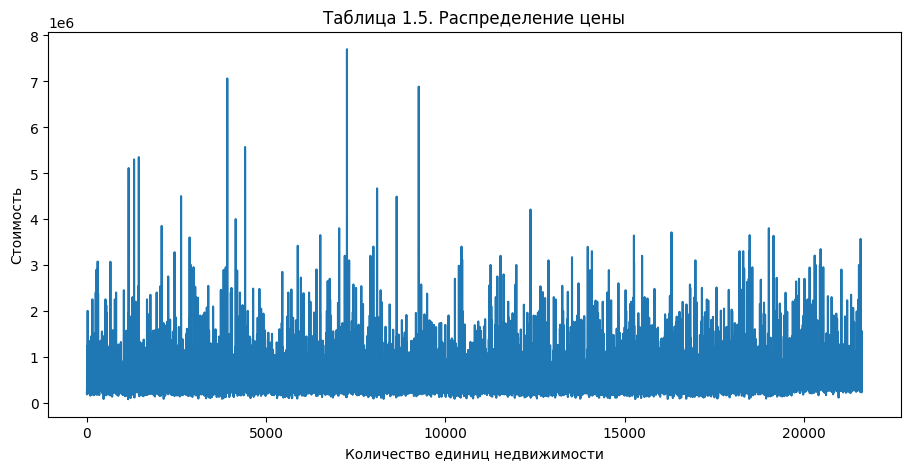

In [730]:
plt.figure(figsize=(11, 5))
plt.plot(df['price'])
plt.title('Таблица 1.5. Распределение цены')
plt.xlabel('Количество единиц недвижимости')
plt.ylabel('Стоимость');

##### 1.3. Изучите распределение квадратуры жилой

In [731]:
living_rooms = df.groupby('sqft_living')['id'].agg(count='count').reset_index().sort_values(by='sqft_living')
living_rooms.head()

,sqft_living,count
0,290,1
1,370,1
2,380,1
3,384,1
4,390,2


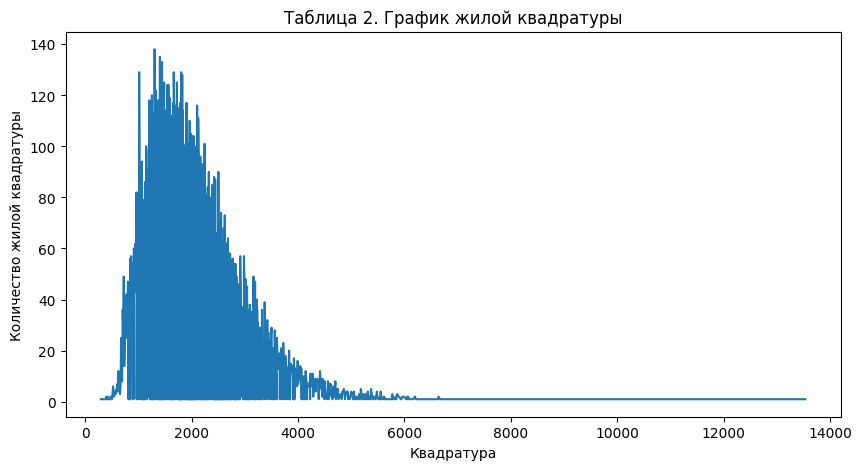

In [732]:
plt.figure(figsize=(10, 5))
plt.plot(living_rooms['sqft_living'], living_rooms['count'])
plt.title('Таблица 2. График жилой квадратуры')
plt.xlabel('Квадратура')
plt.ylabel('Количество жилой квадратуры')
plt.xticks(rotation = 0);

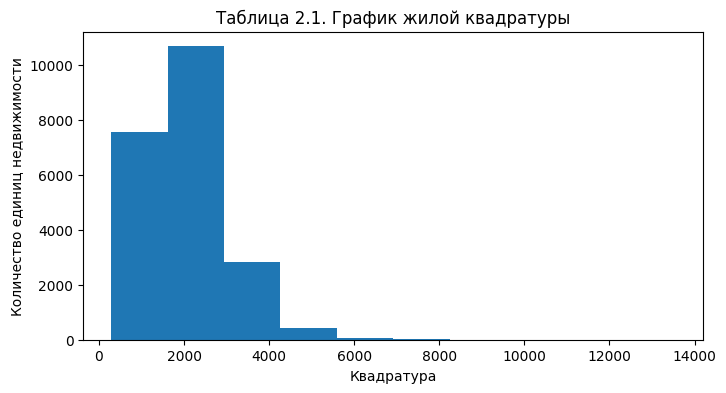

In [733]:
plt.figure(figsize=(8, 4))
plt.hist(df['sqft_living'])
plt.title('Таблица 2.1. График жилой квадратуры')
plt.xlabel('Квадратура') 
plt.ylabel('Количество единиц недвижимости')
plt.xticks(rotation = 0);

##### 1.4. Изучите распределение года постройки

In [734]:
year_of_built = df.groupby('yr_built')['id'].agg(count = 'count').reset_index().sort_values(by = 'yr_built')
year_of_built

,yr_built,count
0,1900,87
1,1901,29
2,1902,27
3,1903,46
4,1904,45
...,...,...
111,2011,130
112,2012,170
113,2013,201
114,2014,559


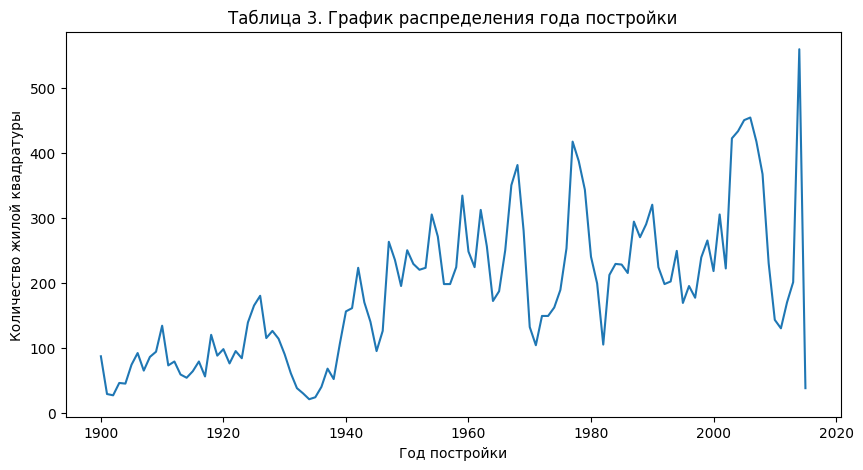

In [735]:
plt.figure(figsize=(10, 5))
plt.plot(year_of_built['yr_built'], year_of_built['count'])
plt.title('Таблица 3. График распределения года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество жилой квадратуры')
plt.xticks(rotation = 0);

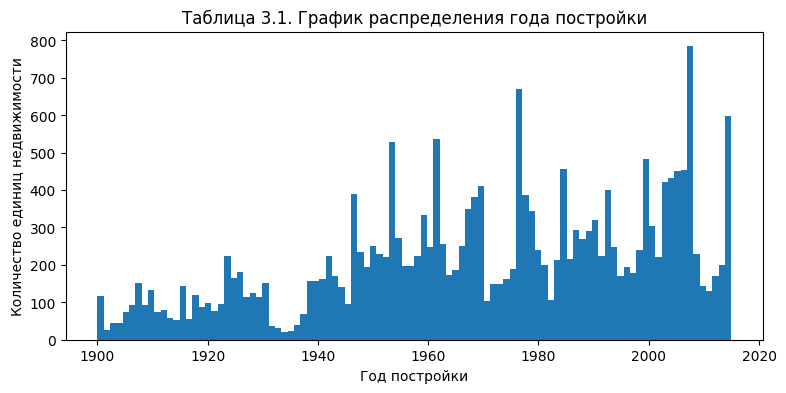

In [755]:
plt.figure(figsize=(9, 4))
plt.hist(df['yr_built'], bins = 100)
plt.title('Таблица 3.1. График распределения года постройки')
plt.xlabel('Год постройки') 
plt.ylabel('Количество единиц недвижимости')
plt.xticks(rotation = 0);

## 2 задача
##### 2.1. Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы

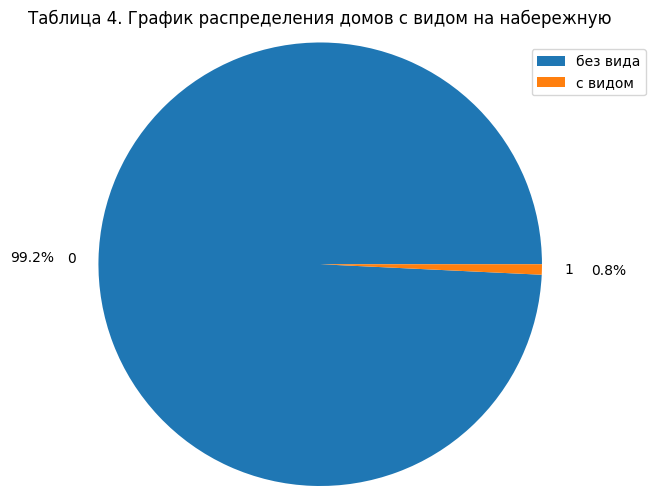

In [737]:
best_view = df['waterfront'].value_counts()
best_view

plt.pie(best_view.values, autopct='%.1f%%', labels = best_view.index, pctdistance = 1.3, radius = 1.5)
plt.title('Таблица 4. График распределения домов с видом на набережную', pad = 40) # pad - расстояние между заголовком и диаграммой
# plt.legend(['без вида', 'с видом'], loc='center left');
plt.legend(['без вида', 'с видом'], loc='upper right', bbox_to_anchor=(1.4, 1.1));


##### 2.2. Изучите распределение этажей домов

Text(0.5, 1.0, 'Таблица 5. График распределения этажей')

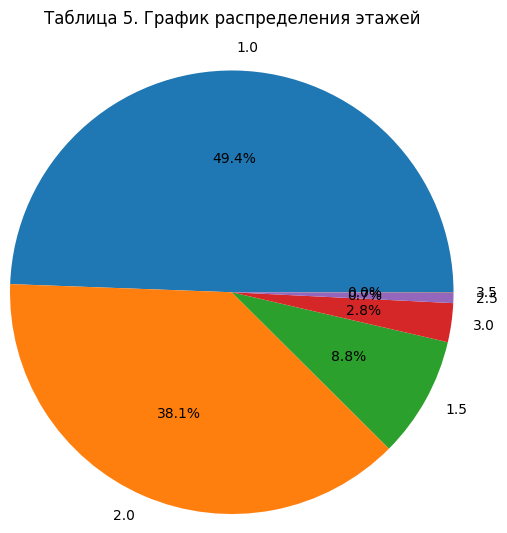

In [738]:
all_floors = df['floors'].value_counts()
all_floors
plt.pie(all_floors.values, autopct='%.1f%%', labels = all_floors.index, radius = 1.5)
plt.title('Таблица 5. График распределения этажей', pad = 60)

In [739]:
most_floors = df.groupby('floors')['id'].agg(count = 'count').reset_index().sort_values(by = 'floors')
most_floors

,floors,count
0,1.0,10680
1,1.5,1910
2,2.0,8241
3,2.5,161
4,3.0,613
5,3.5,8


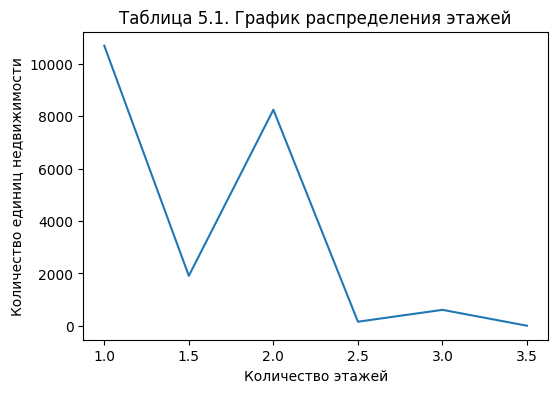

In [740]:
plt.figure(figsize=(6, 4))
plt.plot(most_floors['floors'], most_floors['count'])
plt.title('Таблица 5.1. График распределения этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество единиц недвижимости')
plt.xticks(rotation = 0);

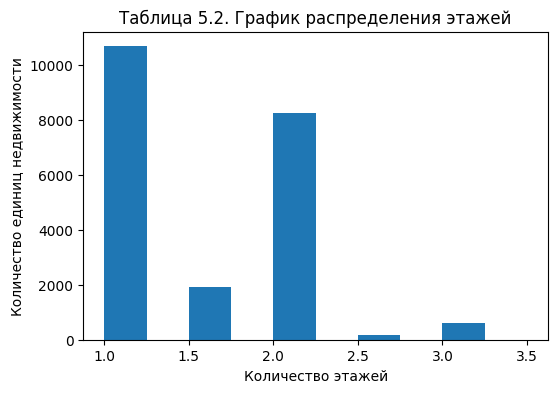

In [741]:
plt.figure(figsize=(6, 4))
plt.hist(df['floors'])
plt.title('Таблица 5.2. График распределения этажей')
plt.xlabel('Количество этажей') 
plt.ylabel('Количество единиц недвижимости')
plt.xticks(rotation = 0);

##### 2.3. Изучите распределение состояния домов

In [742]:
condition1 = df['condition'].value_counts().reset_index()
condition1.head()

,condition,count
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


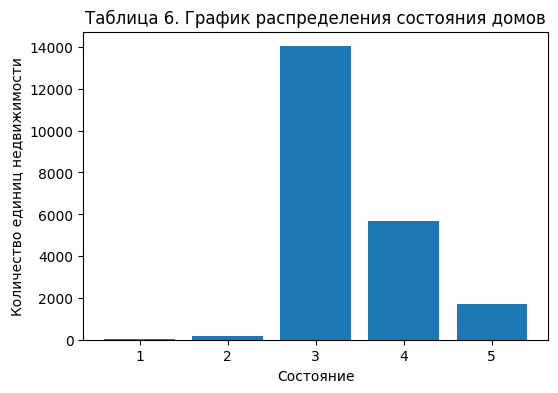

In [743]:
plt.figure(figsize=(6, 4))
plt.bar(condition1['condition'], condition1['count'])
plt.title('Таблица 6. График распределения состояния домов')
plt.xlabel('Состояние') 
plt.ylabel('Количество единиц недвижимости')
plt.xticks(rotation = 0);

In [744]:
type_of_condition = df.groupby('condition')['id'].agg(count = 'count').reset_index().sort_values(by = 'condition')
type_of_condition.sample(5)

,condition,count
1,2,172
0,1,30
3,4,5679
2,3,14031
4,5,1701


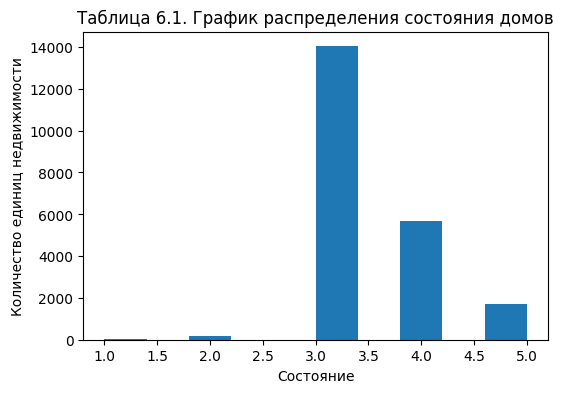

In [745]:
plt.figure(figsize=(6, 4))
plt.hist(df['condition'])
plt.title('Таблица 6.1. График распределения состояния домов')
plt.xlabel('Состояние') 
plt.ylabel('Количество единиц недвижимости')
plt.xticks(rotation = 0);

In [746]:
count_view = df['view'].value_counts().reset_index()
count_view.head()

,view,count
0,0,19489
1,2,963
2,3,510
3,1,332
4,4,319


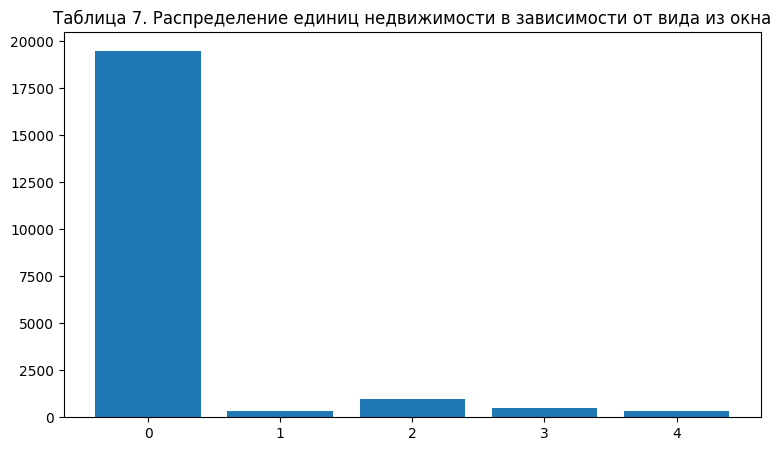

In [747]:
plt.figure(figsize=(9, 5))
plt.bar(count_view['view'], count_view['count'])
plt.title('Таблица 7. Распределение единиц недвижимости в зависимости от вида из окна');

## 3 задача
##### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [748]:
built_price = df.groupby('yr_built')['price'].mean().reset_index()
built_price

,yr_built,price
0,1900,581387.206897
1,1901,556935.931034
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444
...,...,...
111,2011,544522.000000
112,2012,527447.335294
113,2013,678545.452736
114,2014,683681.754919


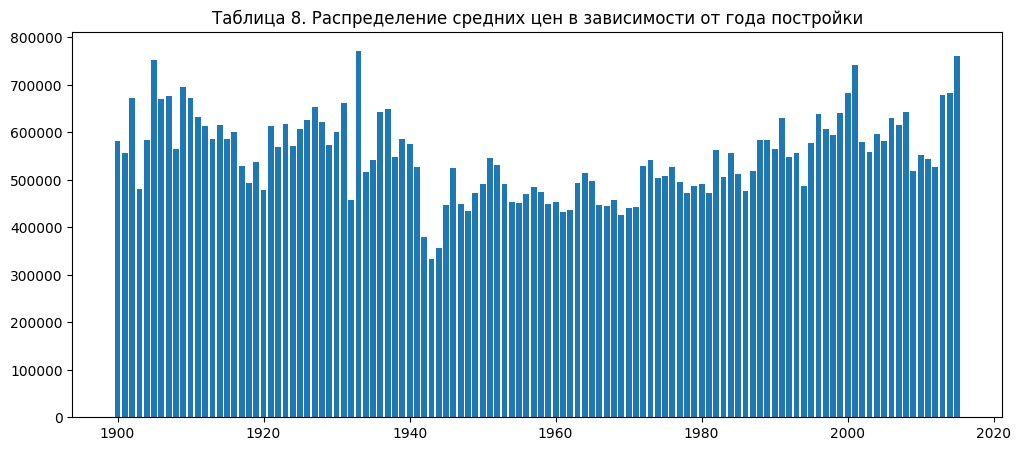

In [749]:
plt.figure(figsize=(12, 5))
plt.bar(built_price['yr_built'], built_price['price'])
plt.title('Таблица 8. Распределение средних цен в зависимости от года постройки');

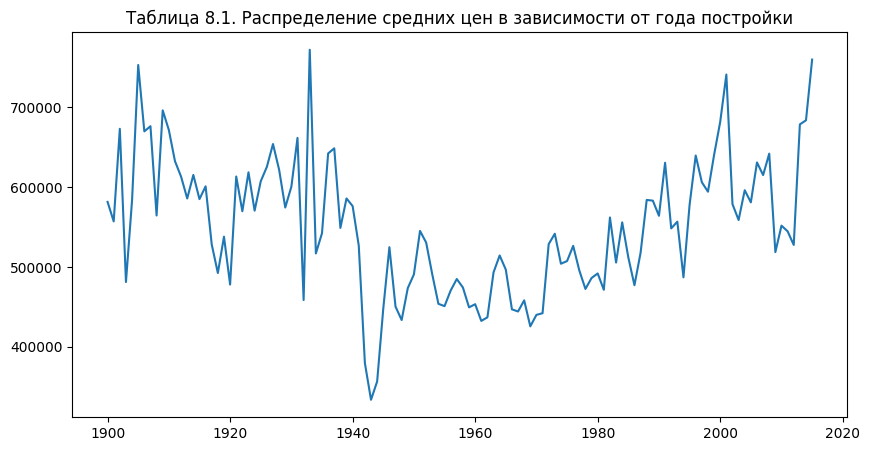

In [750]:
plt.figure(figsize=(10, 5))
plt.plot(built_price['yr_built'], built_price['price'])
plt.title('Таблица 8.1. Распределение средних цен в зависимости от года постройки');

#### <span style="color:green">Вывод: </span>
Самые дешевые дома получаются 1940-х годов постройки, по ценам прямо таки провал. А самые дорогие - где-то 1910-е, 1930-е, 2000-е, 2010-е. После 1940-х годов цены постепенно растут с периодическими падениями. А супер-старые дома тоже хороши в цене, видимо, раритет:)

In [751]:
living_price = df.groupby('sqft_living')['price'].mean().reset_index()
living_price

,sqft_living,price
0,290,142000.0
1,370,276000.0
2,380,245000.0
3,384,265000.0
4,390,236500.0
...,...,...
1033,9640,4668000.0
1034,9890,6885000.0
1035,10040,7062500.0
1036,12050,7700000.0


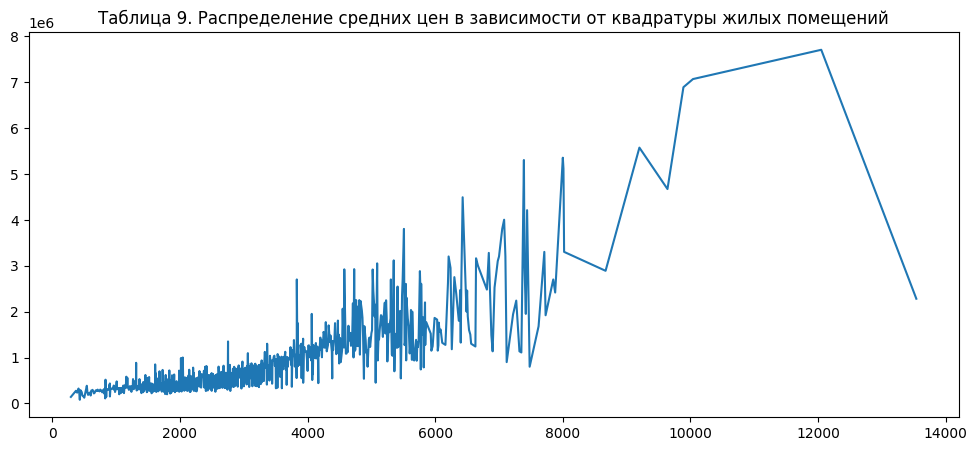

In [752]:
plt.figure(figsize=(12, 5))
plt.plot(living_price['sqft_living'],  living_price['price'])
plt.title('Таблица 9. Распределение средних цен в зависимости от квадратуры жилых помещений');

#### <span style="color:green">Вывод: </span>
До квадратуры 4000 цены держатся примерно в одном диапазоне, затем происходит увеличение цены, самая большая средняя цена у квадратуры 10000-20000 и она стабильно растет.

In [753]:
price_view = df.groupby('view')['price'].mean().reset_index()
price_view

,view,price
0,0,4.965642e+05
1,1,8.122808e+05
2,2,7.924009e+05
3,3,9.719653e+05
4,4,1.463711e+06


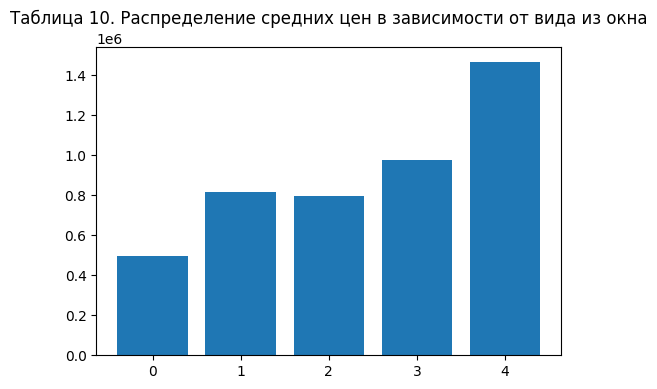

In [754]:
plt.figure(figsize=(6, 4))
plt.bar(price_view['view'], price_view['price'])
plt.title('Таблица 10. Распределение средних цен в зависимости от вида из окна');

#### <span style="color:green">Вывод: </span>
Как мы могли предположить, самые дорогие квартиры - с самым лучшим видом, значение 4. Самые дешевые с видом 0. А виды 1-3 примерно в одной ценовой категории.